In [16]:
import pandas as pd
import pystan
import seaborn as sns
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [25]:
data  = pd.read_csv("D:\Downloads\winequality-red.csv",sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='alcohol', ylabel='Count'>

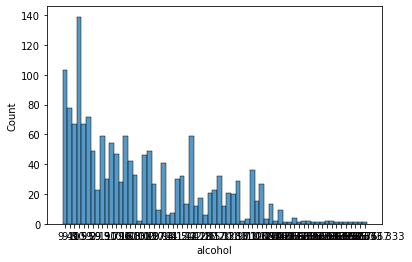

In [33]:
sns.histplot(y)

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

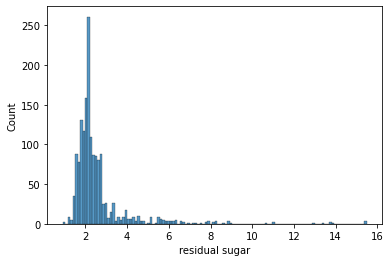

In [35]:
sns.histplot(z)

In [18]:
x = data["quality"]
y = data["alcohol"]
z = data["residual sugar"]
print(x)
print(y)
print(z)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64
0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64
0       1.9
1       2.6
2       2.3
3       1.9
4       1.9
       ... 
1594    2.0
1595    2.2
1596    2.3
1597    2.0
1598    3.6
Name: residual sugar, Length: 1599, dtype: float64


In [19]:
print("Min y:")
print(np.min(y))
print("Max y:")
print(np.max(y))
print("Promedio z:")
print(np.mean(z))
print("Desv. Est. z:")
print(np.std(z))


Min y:
8.4
Max y:
14.9
Promedio z:
2.5388055034396517
Desv. Est. z:
1.4094871124880504


In [27]:
sns.set()
np.random.seed(101)

model = """
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
  vector[N] z;
}
parameters {
  real alpha;
  real beta;
  real gamma;
  real<lower=0> sigma;
}
model {
  // priors
  //alpha ~ normal(0, 10); 
  beta ~ uniform(8, 15);
  gamma ~ normal(3, 1);
  //sigma ~ half-normal(0, 2.5); 
  sigma ~ normal(0, 2.5); 

  // model
  x ~ normal(alpha + y * beta + z * gamma, sigma);
}
"""
# parametros
alpha = 2
beta = 0.5
gamma = 4
sigma = 2

#plot
x = alpha + y * beta + z * gamma

#normal prom y dev est / uniform min y max

In [28]:
# Data
data = {'N': len(x) , 'x': x , 'y': y , 'z':z} 

# Compile
sm = pystan.StanModel(model_code=model)

# Samples
fit = sm.sampling(data=data, iter=1000, chains=4)
#warmup=500, thin=1, seed=101

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_798818e8aeccc9122d19d7f9e6f3ccfc NOW.


RuntimeError: Initialization failed.

In [8]:
print(fit.stansummary())

NameError: name 'fit' is not defined

In [ ]:
ax = az.plot_trace(fit, var_names=["alpha","beta","gamma","sigma"])